In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import math 

In [17]:
# CONSTANTS TO CALCULATE THE OUTPUT OF THE FILTERS FOR THE THREE CASES
number_of_bits = 10
fs = 10

In [19]:
# GENERAL FUNCTIONS
def generatRandomBits():
    # generate a random number with number_of_bits passed 
    return np.random.choice([0, 1], size=(number_of_bits))

def convertToPulses(generated_bits):
    generated_bits[generated_bits == 0] = -1

    signal = np.repeat(generated_bits, fs)

    return signal

def addWhiteGaussianNoise(generated_bits, sigma):

    generated_noise = np.random.normal(loc=0, scale=sigma, size=fs*number_of_bits)

    scaled_samples_with_noise = np.ones((generated_bits.shape[0], fs))
    scaled_samples = np.ones((generated_bits.shape[0], fs))
    for i in range(generated_bits.shape[0]):
        scaled_samples[i, :] *= generated_bits[i]
        scaled_samples_with_noise[i, :] *= generated_bits[i]
        scaled_samples_with_noise[i, :] += generated_noise[i*fs:(i+1)*fs]
    return scaled_samples, scaled_samples_with_noise
    
def convolute(scaled_samples_with_noise, received_filter):

    convolution_result_sampled_Tp = np.zeros(number_of_bits)
    
    if(received_filter is None):
        convolution_result = scaled_samples_with_noise.flatten()
    else:
        convolution_result = np.convolve(scaled_samples_with_noise.flatten(), received_filter)
    for i in range(number_of_bits):
        convolution_result_sampled_Tp[i] = convolution_result[(fs - 1) + fs * i]

    return convolution_result, convolution_result_sampled_Tp

def calculateProbabilityOfError(true_bits, convolution_result, Z):

    # applying threshhold to sample output with lamda = 0
    received_samples = np.ones(true_bits.shape[0])
    received_samples += (-2 * (convolution_result < 0))

    # calculate simulation probability of error
    simulation = np.sum(received_samples != true_bits)
    simulation /= true_bits.shape[0]

    # calculate theoretical probability of error
    theoretical = math.erfc(Z)

    return theoretical, simulation

In [29]:
# generate random bits
generated_bits = generatRandomBits()

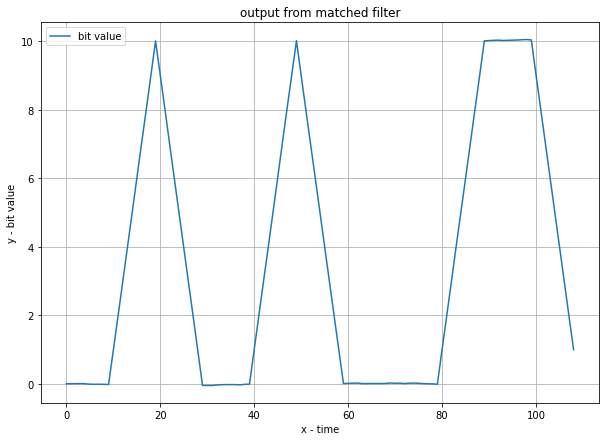

In [30]:
# CASE ONE :  The receive filter 𝒉(𝒕) is a matched filter with unit energy

received_filter_matched = np.ones(fs)
for E_div_N0_db in range(-10, 21):
    E_div_N0 = 10 ** (E_div_N0_db/10)
    transmitted_samples, received_samples = addWhiteGaussianNoise(generated_bits, 1/(2*E_div_N0))
    filtered_samples, filtered_bits = convolute(received_samples, received_filter_matched)

# plot output of the received filter
plt.figure(figsize=(10,7))
plt.plot(range(0, filtered_samples.flatten().shape[0]), filtered_samples.flatten(), label = "bit value")

plt.xlabel('x - time')
plt.ylabel('y - bit value')
plt.title('output from matched filter')

plt.legend()
plt.grid()
plt.show()

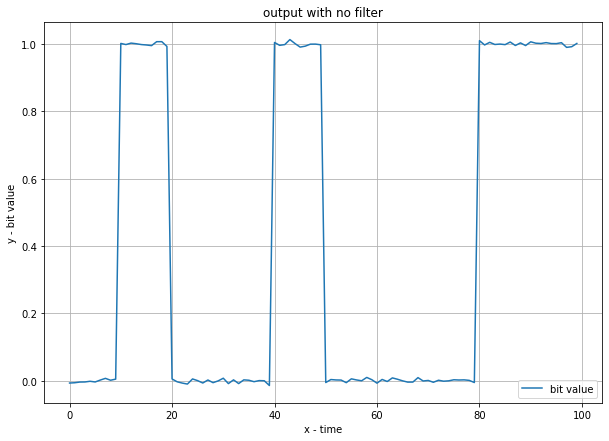

In [31]:
# CASE TWO: The receive filter 𝒉(𝒕) is not existent (i.e. 𝒉(𝒕) = 𝜹(𝒕))

received_filter_matched = None

for E_div_N0_db in range(-10, 21):
    E_div_N0 = 10 ** (E_div_N0_db/10)
    transmitted_samples, received_samples = addWhiteGaussianNoise(generated_bits, 1/(2*E_div_N0))
    filtered_samples, filtered_bits = convolute(received_samples, received_filter_matched)

# plot output of the received filter
plt.figure(figsize=(10,7))
plt.plot(range(0, filtered_samples.flatten().shape[0]), filtered_samples.flatten(), label = "bit value")

plt.xlabel('x - time')
plt.ylabel('y - bit value')
plt.title('output with no filter')

plt.legend()
plt.grid()
plt.show()


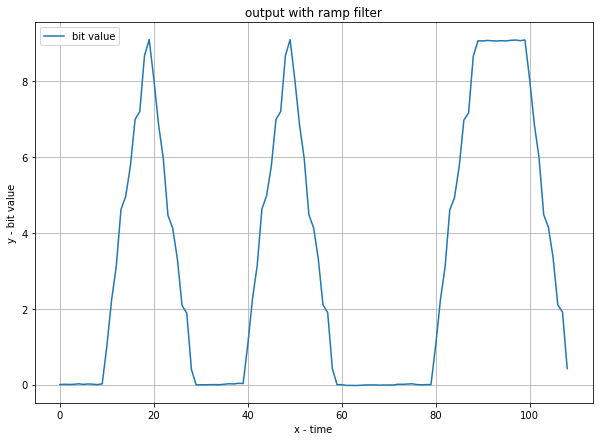

In [32]:
# CASE THREE:  The receive filter is a ramp with 𝒉(𝒕) = √3t

received_filter_ramp = np.random.uniform(low=0, high=3**0.5, size=number_of_bits)
E = 1
for E_div_N0_db in range(-10, 21):
    E_div_N0 = 10 ** (E_div_N0_db/10)
    transmitted_samples, received_samples = addWhiteGaussianNoise(generated_bits, E/(2*E_div_N0))
    filtered_samples, filtered_bits = convolute(received_samples, received_filter_ramp)

#ploting
plt.figure(figsize=(10,7))
plt.plot(range(0, filtered_samples.flatten().shape[0]), filtered_samples.flatten(), label = "bit value")

plt.xlabel('x - time')
plt.ylabel('y - bit value')
plt.title('output with ramp filter')

plt.legend()
plt.grid()
plt.show()

In [15]:
# CONSTANTS TO CALCULATE THE BIT ERROR RATE
fs = 20
number_of_bits = 10**5

In [16]:
# CALCULATE BIT ERROR RATE FOR THE THREE CASES
generated_bits = generatRandomBits()

# receive with matched filter
received_filter_matched = np.ones(fs)
BER_simulation_1 = []
BER_theortical_1 = []

# receive with no filter
received_filter_empty = None
BER_simulation_2 = []
BER_theortical_2 = []

# receive with ramp filter
received_filter_ramp = np.random.uniform(low=0, high=3**0.5, size=fs)
BER_simulation_3 = []
BER_theortical_3 = []

for E_div_N0_db in range(-10, 21):
    E_div_N0 = 10 ** (E_div_N0_db/10)
    transmitted_samples, received_samples = addWhiteGaussianNoise(generated_bits, 1/(2*E_div_N0))
    filtered_samples1, filtered_bits1 = convolute(received_samples, received_filter_matched)
    filtered_samples2, filtered_bits2 = convolute(received_samples, received_filter_empty)
    filtered_samples3, filtered_bits3 = convolute(received_samples, received_filter_ramp)

    theoretical_BER, simulation_BER = calculateProbabilityOfError(generated_bits, filtered_bits1, E_div_N0 ** 0.5)
    BER_simulation_1.append(simulation_BER)
    BER_theortical_1.append(theoretical_BER)

    theoretical_BER, simulation_BER = calculateProbabilityOfError(generated_bits, filtered_bits2, E_div_N0 ** 0.5)
    BER_simulation_2.append(simulation_BER)
    BER_theortical_2.append(theoretical_BER)

    theoretical_BER, simulation_BER = calculateProbabilityOfError(generated_bits, filtered_bits3, (3**0.5/2) * E_div_N0 ** 0.5)
    BER_simulation_3.append(simulation_BER)
    BER_theortical_3.append(theoretical_BER)


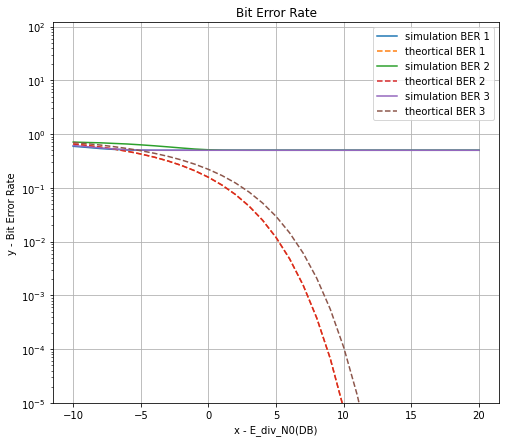

In [13]:
# PLOTTING
plt.figure(figsize=(8,7))
plt.plot(range(-10, 21), BER_simulation_1, label = "simulation BER 1")
plt.plot(range(-10, 21), BER_theortical_1, "--", label = "theortical BER 1")

plt.plot(range(-10, 21), BER_simulation_2, label = "simulation BER 2")
plt.plot(range(-10, 21), BER_theortical_2, "--", label = "theortical BER 2")

plt.plot(range(-10, 21), BER_simulation_3, label = "simulation BER 3")
plt.plot(range(-10, 21), BER_theortical_3, "--", label = "theortical BER 3")

plt.xlabel('x - E_div_N0(DB)')
plt.ylabel('y - Bit Error Rate')
plt.yscale('log')
plt.ylim(10**(-5))
plt.title('Bit Error Rate')

plt.legend()
plt.grid()
plt.show()